## Importing required Libraries

In [26]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.metrics import mean_squared_error
from math import sqrt
from statistics import mean 

import warnings
warnings.filterwarnings("ignore")

In [38]:
data = pd.read_csv("train_data.csv")


In [39]:
print(data.shape)
data.head()

(534, 2)


,Date,count
0,2012-08-25,3
1,2012-08-26,3
2,2012-08-27,2
3,2012-08-28,2
4,2012-08-29,2


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    534 non-null    object
 1   count   534 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.5+ KB


# Required Preprocessing 

In [41]:
data["Date"] = pd.to_datetime(data['Date'],format='%Y-%m-%d')


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    534 non-null    datetime64[ns]
 1   count   534 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 8.5 KB


In [43]:
data.head()

,Date,count
0,2012-08-25,3
1,2012-08-26,3
2,2012-08-27,2
3,2012-08-28,2
4,2012-08-29,2


# Feature Extraction from Datetime

In [44]:
data["year"]=data["Date"].dt.year

In [45]:
data

,Date,count,year
0,2012-08-25,3,2012
1,2012-08-26,3,2012
2,2012-08-27,2,2012
3,2012-08-28,2,2012
4,2012-08-29,2,2012
...,...,...,...
529,2014-02-05,254,2014
530,2014-02-06,216,2014
531,2014-02-07,205,2014
532,2014-02-08,159,2014


In [46]:
data["month"]=data["Date"].dt.month

In [48]:
data

,Date,count,year,month,day
0,2012-08-25,3,2012,8,25
1,2012-08-26,3,2012,8,26
2,2012-08-27,2,2012,8,27
3,2012-08-28,2,2012,8,28
4,2012-08-29,2,2012,8,29
...,...,...,...,...,...
529,2014-02-05,254,2014,2,5
530,2014-02-06,216,2014,2,6
531,2014-02-07,205,2014,2,7
532,2014-02-08,159,2014,2,8


In [47]:
data["day"]=data["Date"].dt.day

In [49]:
data

,Date,count,year,month,day
0,2012-08-25,3,2012,8,25
1,2012-08-26,3,2012,8,26
2,2012-08-27,2,2012,8,27
3,2012-08-28,2,2012,8,28
4,2012-08-29,2,2012,8,29
...,...,...,...,...,...
529,2014-02-05,254,2014,2,5
530,2014-02-06,216,2014,2,6
531,2014-02-07,205,2014,2,7
532,2014-02-08,159,2014,2,8


In [50]:
data["day_name"]=data["Date"].dt.day_name()

In [51]:
data

,Date,count,year,month,day,day_name
0,2012-08-25,3,2012,8,25,Saturday
1,2012-08-26,3,2012,8,26,Sunday
2,2012-08-27,2,2012,8,27,Monday
3,2012-08-28,2,2012,8,28,Tuesday
4,2012-08-29,2,2012,8,29,Wednesday
...,...,...,...,...,...,...
529,2014-02-05,254,2014,2,5,Wednesday
530,2014-02-06,216,2014,2,6,Thursday
531,2014-02-07,205,2014,2,7,Friday
532,2014-02-08,159,2014,2,8,Saturday


In [53]:
data["week"]=data["Date"].dt.week

In [54]:
data["quarter"]=data["Date"].dt.quarter

In [56]:
data["hour"]=data["Date"].dt.hour

In [59]:
data["dayofweek"]=data["Date"].dt.dayofweek

In [60]:
data

,Date,count,year,month,day,day_name,week,quarter,hour,dayofweek
0,2012-08-25,3,2012,8,25,Saturday,34,3,0,5
1,2012-08-26,3,2012,8,26,Sunday,34,3,0,6
2,2012-08-27,2,2012,8,27,Monday,35,3,0,0
3,2012-08-28,2,2012,8,28,Tuesday,35,3,0,1
4,2012-08-29,2,2012,8,29,Wednesday,35,3,0,2
...,...,...,...,...,...,...,...,...,...,...
529,2014-02-05,254,2014,2,5,Wednesday,6,1,0,2
530,2014-02-06,216,2014,2,6,Thursday,6,1,0,3
531,2014-02-07,205,2014,2,7,Friday,6,1,0,4
532,2014-02-08,159,2014,2,8,Saturday,6,1,0,5


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       534 non-null    datetime64[ns]
 1   count      534 non-null    int64         
 2   year       534 non-null    int64         
 3   month      534 non-null    int64         
 4   day        534 non-null    int64         
 5   day_name   534 non-null    object        
 6   week       534 non-null    int64         
 7   quarter    534 non-null    int64         
 8   hour       534 non-null    int64         
 9   dayofweek  534 non-null    int64         
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 41.8+ KB


# time series plot

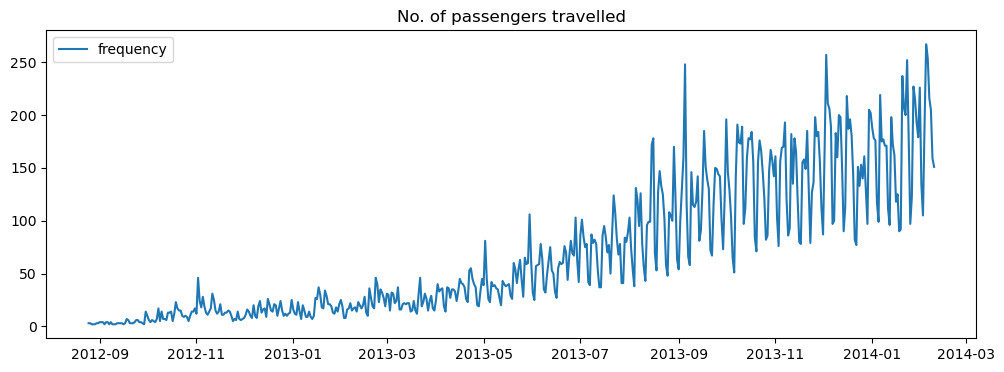

In [79]:
plt.figure(figsize=(12,4))

plt.plot(data["Date"], data['count'], label='frequency')


plt.legend(loc='best')
plt.title("No. of passengers travelled")
plt.show()